Math 5750/6880: Mathematics of Data Science \
Project 2

# 1. Clustering Gaussian Blobs using $k$-means

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate 5 Gaussian blobs in 10 dimensions
X, y_true = make_blobs(
    n_samples=1000,
    centers=5,
    n_features=10,
    cluster_std=1.5,
    random_state=1)        # reproducibility
X = StandardScaler().fit_transform(X)

print(type(X),X.shape)
print(type(y_true),y_true.shape)

<class 'numpy.ndarray'> (1000, 10)
<class 'numpy.ndarray'> (1000,)


Smallest K-means Inertia Value: 924.32



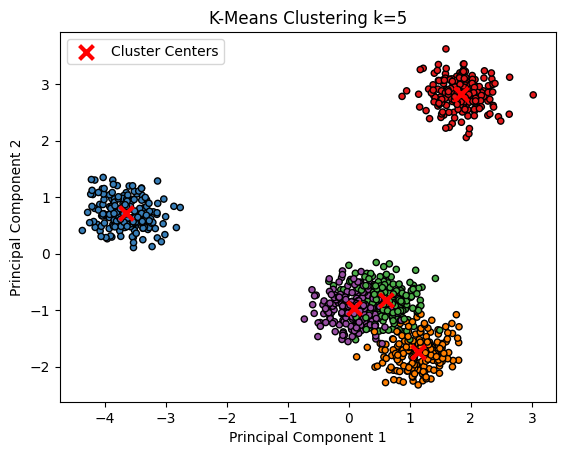

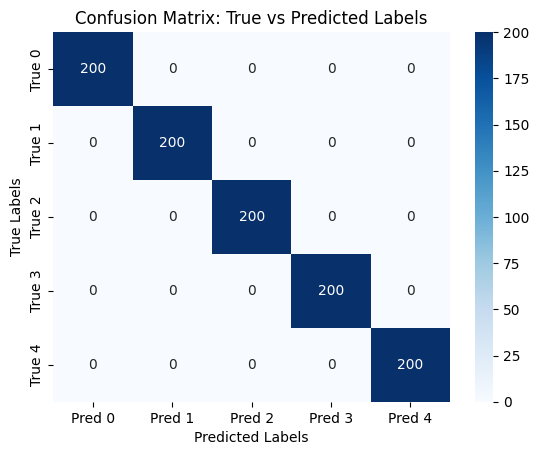

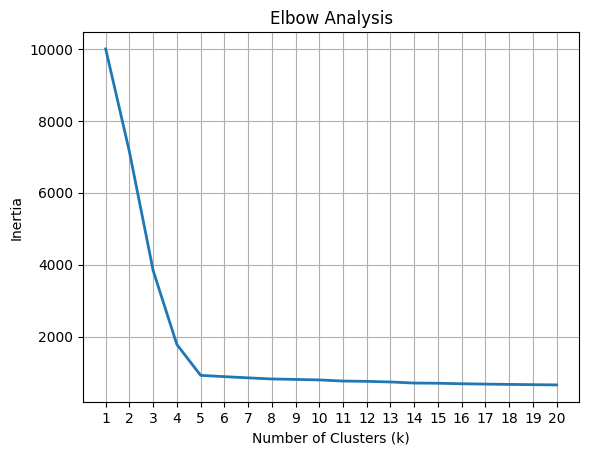


Inertia Values for Different Values of k:
k = 1: Inertia = 10000.00
k = 2: Inertia = 7139.16
k = 3: Inertia = 3836.38
k = 4: Inertia = 1780.42
k = 5: Inertia = 924.32
k = 6: Inertia = 887.74
k = 7: Inertia = 854.65
k = 8: Inertia = 823.30
k = 9: Inertia = 811.04
k = 10: Inertia = 796.77
k = 11: Inertia = 765.24
k = 12: Inertia = 756.95
k = 13: Inertia = 739.99
k = 14: Inertia = 709.94
k = 15: Inertia = 704.47
k = 16: Inertia = 690.57
k = 17: Inertia = 680.57
k = 18: Inertia = 672.75
k = 19: Inertia = 665.04
k = 20: Inertia = 657.88


In [2]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.optimize import linear_sum_assignment
import random
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#e41a1c","#984ea3","#a65628","#377eb8","#ffff33","#4daf4a","#ff7f00"])

np.random.seed(1)
random.seed(1)

kmeans_model = KMeans(n_clusters=5, random_state=1) # n_clusters = k, other params: n_init=1, init='random', max_iter=1
y_pred = kmeans_model.fit_predict(X)

pca_model = PCA()
X_PCA = pca_model.fit_transform(X)

cluster_centers_pca = pca_model.transform(kmeans_model.cluster_centers_)

print(f"Smallest K-means Inertia Value: {kmeans_model.inertia_:.2f}")
print()

plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c=y_pred, cmap=cmap, edgecolor='k', s=20)
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], c='red', marker='x', s=100, linewidth=3, label='Cluster Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering k=5')
plt.legend()
plt.show()

print()
print()

cm = confusion_matrix(y_true, y_pred)

# Find the best label mapping
row_ind, col_ind = linear_sum_assignment(-cm)

# Create a mapping dictionary
label_mapping = {}
for i in range(len(row_ind)):
    label_mapping[col_ind[i]] = row_ind[i]

# Apply the mapping
y_pred_mapped = np.array([label_mapping[label] for label in y_pred])

cm_mapped = confusion_matrix(y_true, y_pred_mapped)

sns.heatmap(cm_mapped, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Pred {i}' for i in range(5)],
            yticklabels=[f'True {i}' for i in range(5)])
plt.title('Confusion Matrix: True vs Predicted Labels')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

print()
print()

k_range = range(1, 21)
inertia_values = []

for k in k_range:
    kmeans_temp_val = KMeans(n_clusters=k, random_state=1)
    kmeans_temp_val.fit(X)
    inertia_values.append(kmeans_temp_val.inertia_)

plt.plot(k_range, inertia_values, linewidth=2)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Analysis')
plt.grid(True)
plt.xticks(k_range)
plt.show()

print()
print("Inertia Values for Different Values of k:")

for i in range(len(k_range)):
  k = k_range[i]
  inertia = inertia_values[i]
  print(f"k = {k}: Inertia = {inertia:.2f}")

# 2. Clustering Fashion-MNIST using $k$-means

In [3]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

# Load Fashion-MNIST from OpenML
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
X, y = fetch_openml("Fashion-MNIST", version=1, as_frame=False, parser="auto", return_X_y=True)
y = y.astype(int)

print(type(X),X.shape)
print(type(y),y.shape)

<class 'numpy.ndarray'> (70000, 784)
<class 'numpy.ndarray'> (70000,)


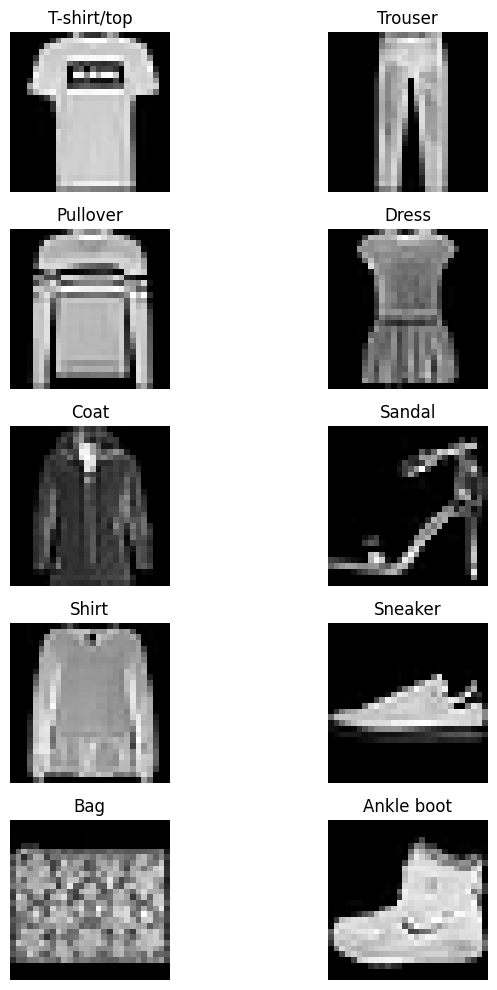

In [5]:
# 5x2 array of figures, each plotting a distinct article of clothing
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(8, 10))

for i in range(10):
    plt.subplot(5, 2, i+1)
    first_image = X[y == i][0].reshape(28, 28)
    plt.imshow(first_image, cmap='gray')
    plt.title(classes[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [6]:
# Sample
np.random.seed(1)
random.seed(1)

print("Class counts:")
for i in range(len(classes)):
  print(f"{classes[i]}: {np.sum(y == i)}")

X_sample = []
y_sample = []

for i in range(len(classes)):
    class_mask = y == i
    class_indices = np.where(class_mask)[0]
    random_sample = np.random.choice(class_indices, 2000, replace=False)

    X_sample.extend(X[random_sample])
    y_sample.extend(y[random_sample])

X_sample = np.array(X_sample)
y_sample = np.array(y_sample)

print()
print("Sample class counts:")
for i in range(len(classes)):
  print(f"{classes[i]}: {np.sum(y_sample == i)}")

print()
print("Sampled data shape:", X_sample.shape)
print("Sampled labels shape:", y_sample.shape)


Class counts:
T-shirt/top: 7000
Trouser: 7000
Pullover: 7000
Dress: 7000
Coat: 7000
Sandal: 7000
Shirt: 7000
Sneaker: 7000
Bag: 7000
Ankle boot: 7000

Sample class counts:
T-shirt/top: 2000
Trouser: 2000
Pullover: 2000
Dress: 2000
Coat: 2000
Sandal: 2000
Shirt: 2000
Sneaker: 2000
Bag: 2000
Ankle boot: 2000

Sampled data shape: (20000, 784)
Sampled labels shape: (20000,)


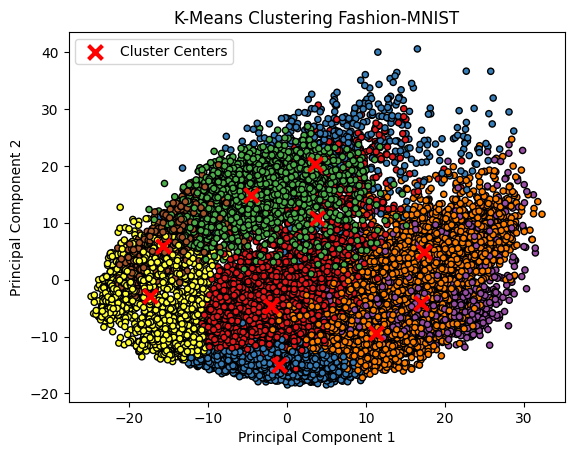

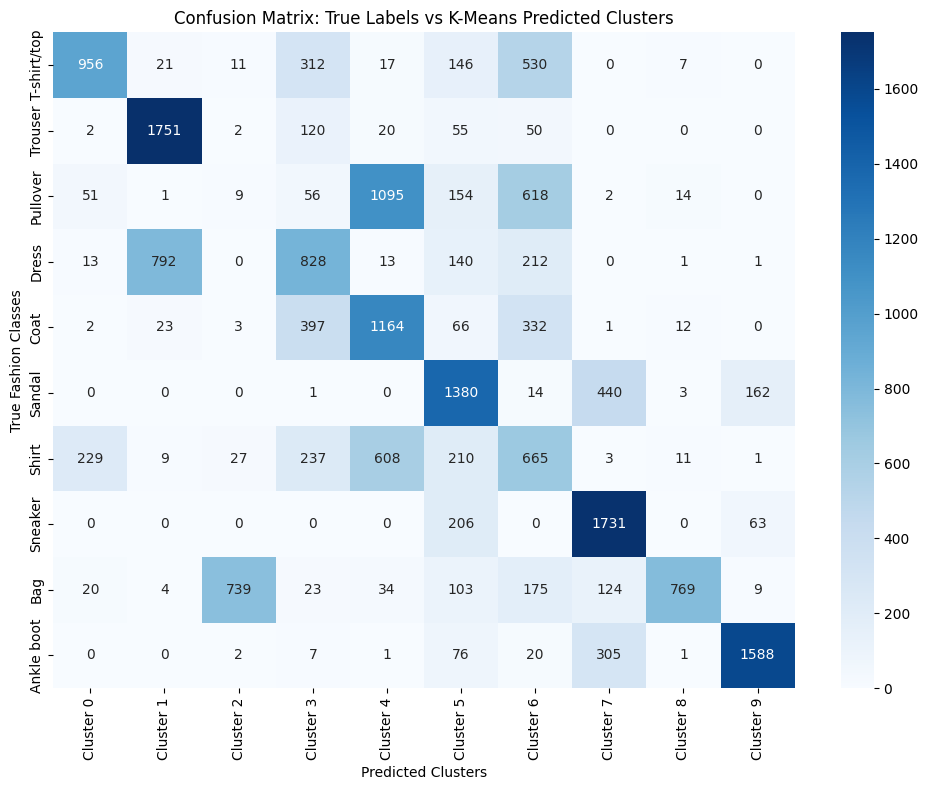

In [11]:
# K-Means Cluster Analysis
scaler = StandardScaler()
X_sample_scaled = scaler.fit_transform(X_sample)

kmeans_model = KMeans(n_clusters=10, random_state=1)
y_pred = kmeans_model.fit_predict(X_sample_scaled)

pca_model = PCA()
X_PCA = pca_model.fit_transform(X_sample_scaled)

cluster_centers_pca = pca_model.transform(kmeans_model.cluster_centers_)

plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c=y_pred, cmap=cmap, edgecolor='k', s=20)
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], c='red', marker='x', s=100, linewidth=3, label='Cluster Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Fashion-MNIST')
plt.legend()
plt.show()

print()
print()

cm = confusion_matrix(y_sample, y_pred)

# Find the best label mapping
row_ind, col_ind = linear_sum_assignment(-cm)

# Create a mapping dictionary
label_mapping = {}
for i in range(len(row_ind)):
    label_mapping[col_ind[i]] = row_ind[i]

# Apply the mapping
y_pred_mapped = np.array([label_mapping[label] for label in y_pred])

cm_mapped = confusion_matrix(y_sample, y_pred_mapped)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_mapped, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Cluster {i}' for i in range(10)],
            yticklabels=classes)
plt.title('Confusion Matrix: True Labels vs K-Means Predicted Clusters')
plt.ylabel('True Fashion Classes')
plt.xlabel('Predicted Clusters')
plt.tight_layout()
plt.show()

# 3. Dimensionality reduction for Fashion-MNIST

In [18]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

# Load Fashion-MNIST from OpenML
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
X, y = fetch_openml("Fashion-MNIST", version=1, as_frame=False, parser="auto", return_X_y=True)
y = y.astype(int)

print(type(X),X.shape)
print(type(y),y.shape)

<class 'numpy.ndarray'> (70000, 784)
<class 'numpy.ndarray'> (70000,)


In [22]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
from scipy.stats import pearsonr
import pandas as pd
import random
from sklearn.decomposition import PCA
from sklearn.random_projection import GaussianRandomProjection

np.random.seed(1)
random.seed(1)

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

X_sample = []
y_sample = []

for i in range(len(classes)):
    class_mask = y == i
    class_indices = np.where(class_mask)[0]
    random_sample = np.random.choice(class_indices, 250, replace=False)

    X_sample.extend(X[random_sample])
    y_sample.extend(y[random_sample])

X_sample = np.array(X_sample)
y_sample = np.array(y_sample)

print()
print("Sample class counts:")
for i in range(len(classes)):
  print(f"{classes[i]}: {np.sum(y_sample == i)}")

print()
print("Sampled data shape:", X_sample.shape)
print()

# Scale sampled data
scaler = StandardScaler()
X_sample_scaled = scaler.fit_transform(X_sample)

# Target dimensions
target_dims = [10, 20, 50, 100, 200]

# Pairwise distances in original standardized space
original_space = euclidean_distances(X_sample_scaled)

pca_correlations = []
print("PCA:")

# PCA for each target dimension
for k in target_dims:
    pca = PCA(n_components=k)
    pca_k = pca.fit_transform(X_sample_scaled)

    # Reduced pairwise distances
    reduced_space = euclidean_distances(pca_k)

    # Correlation between distance matrices
    correlation, _ = pearsonr(original_space.flatten(), reduced_space.flatten())
    pca_correlations.append(correlation)

    print(f"k={k} - Correlation: {correlation:.4f}")


print()
print()

random_projection_correlations = []
print("Random Projections:")

# Random projections for each target dimension
for k in target_dims:
    random_projection = GaussianRandomProjection(n_components=k, random_state=1)
    random_projection_k = random_projection.fit_transform(X_sample_scaled)

    # Reduced pairwise distances
    reduced_space = euclidean_distances(random_projection_k)

    # Correlation between distance matrices
    correlation, _ = pearsonr(original_space.flatten(), reduced_space.flatten())
    random_projection_correlations.append(correlation)

    print(f"k={k} - Correlation: {correlation:.4f}")


Sample class counts:
T-shirt/top: 250
Trouser: 250
Pullover: 250
Dress: 250
Coat: 250
Sandal: 250
Shirt: 250
Sneaker: 250
Bag: 250
Ankle boot: 250

Sampled data shape: (2500, 784)

PCA:
k=10 - Correlation: 0.9091
k=20 - Correlation: 0.9562
k=50 - Correlation: 0.9881
k=100 - Correlation: 0.9962
k=200 - Correlation: 0.9991


Random Projections:
k=10 - Correlation: 0.8218
k=20 - Correlation: 0.8818
k=50 - Correlation: 0.9482
k=100 - Correlation: 0.9743
k=200 - Correlation: 0.9862


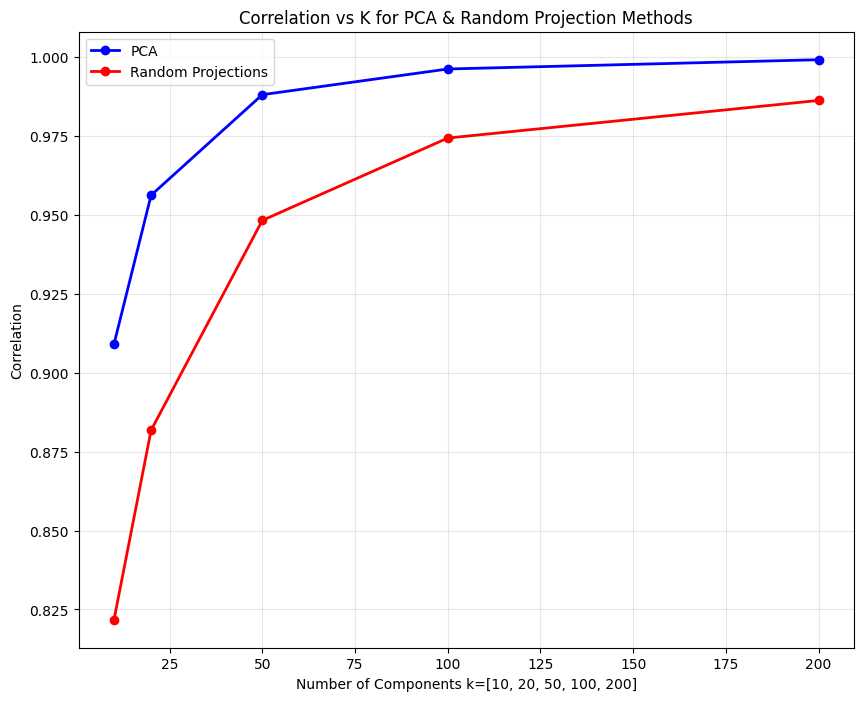

In [23]:
# Graph Correlation vs K for PCA and Random Projections
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.plot(target_dims, pca_correlations, 'b-o', label='PCA', linewidth=2)
plt.plot(target_dims, random_projection_correlations, 'r-o', label='Random Projections', linewidth=2)
plt.xlabel('Number of Components k=[10, 20, 50, 100, 200]')
plt.ylabel('Correlation')
plt.title('Correlation vs K for PCA & Random Projection Methods')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 4. Clustering Fashion-MNIST using spectral clustering

In [24]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

# Load Fashion-MNIST from OpenML
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
X, y = fetch_openml("Fashion-MNIST", version=1, as_frame=False, parser="auto", return_X_y=True)
y = y.astype(int)

print(type(X),X.shape)
print(type(y),y.shape)

<class 'numpy.ndarray'> (70000, 784)
<class 'numpy.ndarray'> (70000,)


In [33]:
# Sample
np.random.seed(1)
random.seed(1)

print("Class counts:")
for i in range(len(classes)):
  print(f"{classes[i]}: {np.sum(y == i)}")

X_sample = []
y_sample = []

for i in range(len(classes)):
    class_mask = y == i
    class_indices = np.where(class_mask)[0]
    random_sample = np.random.choice(class_indices, 2000, replace=False)

    X_sample.extend(X[random_sample])
    y_sample.extend(y[random_sample])

X_sample = np.array(X_sample)
y_sample = np.array(y_sample)

print()
print("Sample class counts:")
for i in range(len(classes)):
  print(f"{classes[i]}: {np.sum(y_sample == i)}")

print()
print("Sampled data shape:", X_sample.shape)
print("Sampled labels shape:", y_sample.shape)

Class counts:
T-shirt/top: 7000
Trouser: 7000
Pullover: 7000
Dress: 7000
Coat: 7000
Sandal: 7000
Shirt: 7000
Sneaker: 7000
Bag: 7000
Ankle boot: 7000

Sample class counts:
T-shirt/top: 2000
Trouser: 2000
Pullover: 2000
Dress: 2000
Coat: 2000
Sandal: 2000
Shirt: 2000
Sneaker: 2000
Bag: 2000
Ankle boot: 2000

Sampled data shape: (20000, 784)
Sampled labels shape: (20000,)


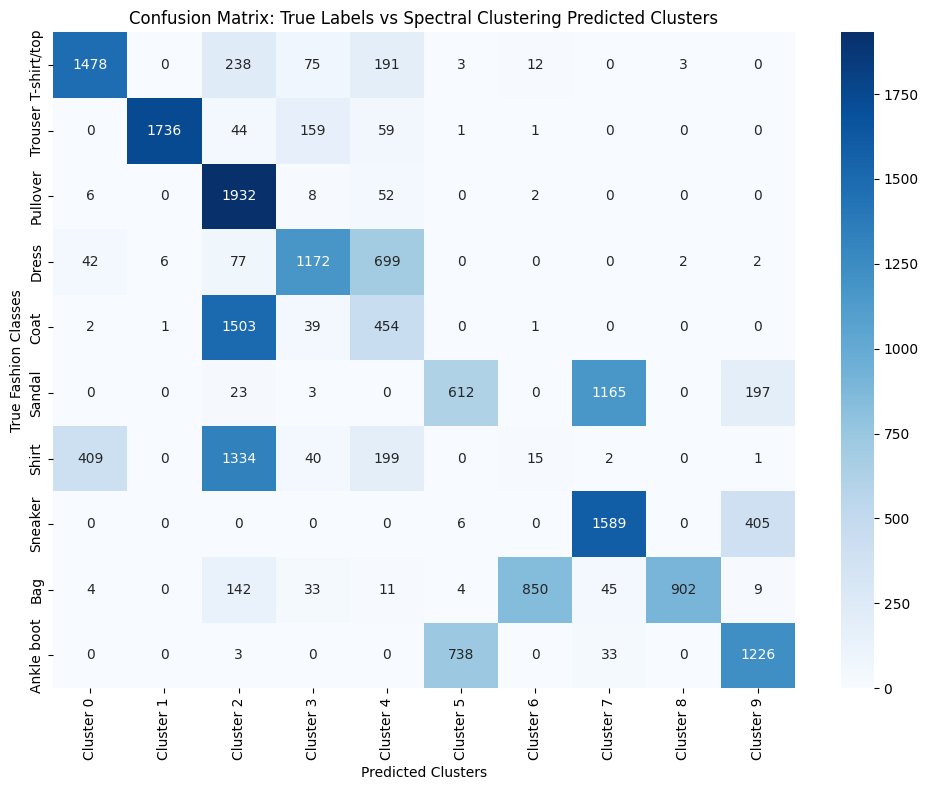

In [34]:
# Spectral Clustering Analysis
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment
from sklearn.cluster import SpectralClustering
import seaborn as sns
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_sample_scaled = scaler.fit_transform(X_sample)

spectral_model = SpectralClustering(n_clusters=10, random_state=1, affinity='nearest_neighbors', n_neighbors=10)
y_pred = spectral_model.fit_predict(X_sample_scaled)

cm = confusion_matrix(y_sample, y_pred)

# Find the best label mapping
row_ind, col_ind = linear_sum_assignment(-cm)

# Create a mapping dictionary
label_mapping = {}
for i in range(len(row_ind)):
    label_mapping[col_ind[i]] = row_ind[i]

# Apply the mapping
y_pred_mapped = np.array([label_mapping[label] for label in y_pred])

cm_mapped = confusion_matrix(y_sample, y_pred_mapped)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_mapped, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Cluster {i}' for i in range(10)],
            yticklabels=classes)
plt.title('Confusion Matrix: True Labels vs Spectral Clustering Predicted Clusters')
plt.ylabel('True Fashion Classes')
plt.xlabel('Predicted Clusters')
plt.tight_layout()
plt.show()